In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df_wine = pd.read_excel("D:\Learnmore\DBM\Data Mining\Dataset\Wine_data.xlsx",engine='openpyxl')

In [8]:
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_wine[features], df_wine['quality'],test_size=0.7,random_state=42)

In [15]:
print('Shape of train dataset: ')
X_train.shape,y_train.shape

Shape of train dataset: 


((1469, 11), (1469,))

In [16]:
print('Shape of test dataset: ')
X_test.shape,y_test.shape

Shape of test dataset: 


((3429, 11), (3429,))

In [17]:
algo_score_col = ['Algo_name','Train MEA','Test MEA','Train R_2','Test R_2']
algo_score = pd.DataFrame(columns=algo_score_col)
from sklearn.metrics import mean_absolute_error, r2_score
def summary_score(model_name,y_train,ypred_train,y_test,ypred_test):
    MAE_train = mean_absolute_error(y_train,ypred_train)
    r2_train = r2_score(y_train,ypred_train)
    MAE_test = mean_absolute_error(y_test,ypred_test)
    r2_test = r2_score(y_test,ypred_test)
    print('Model: ',model_name)
    print('--Result in train and test data set--')
    print('MAE train: ', MAE_train)
    print('MAE test', MAE_test)
    print('R2_score train: ',r2_train)
    print('R2_score test: ', r2_test)
    sum_entry = pd.DataFrame([[model_name,MAE_train,MAE_test,r2_train,r2_test]],columns=algo_score_col)
    return sum_entry

In [18]:
def plot_true_vs_pred(model_name,y_true,y_pred):
    plt.figure(figsize=(18,8))
    plt.plot(y_true,label='Actual',marker='.',markersize=15)
    plt.plot(y_pred,label='Prediction',marker='.',markersize=15)
    plt.ylabel('Price')
    plt.title('Plot True and prediction value in first 100 observations by' + model_name)
    plt.legend()
    plt.show()

In [19]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    n = len(param_range)
    if scoring == 'r2':
        train_score = [scores[0][i].mean() for i in range(0,n)]
        test_score = [scores[1][i].mean() for i in range(0,n)]
    plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()
    plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)
name = lr.__class__.__name__
algo_score = algo_score.append(summary_score(name,y_train,ypred_train,y_test,ypred_test))
cross_val = cross_val_score(lr,X_train,y_train,cv=4)
print('Cross validation average score: ')
print(np.mean(cross_val))

Model:  LinearRegression
--Result in train and test data set--
MAE train:  0.5791796034498256
MAE test 0.5849016294588958
R2_score train:  0.28632153222169476
R2_score test:  0.26998651771817506
Cross validation average score: 
0.26291337581883834


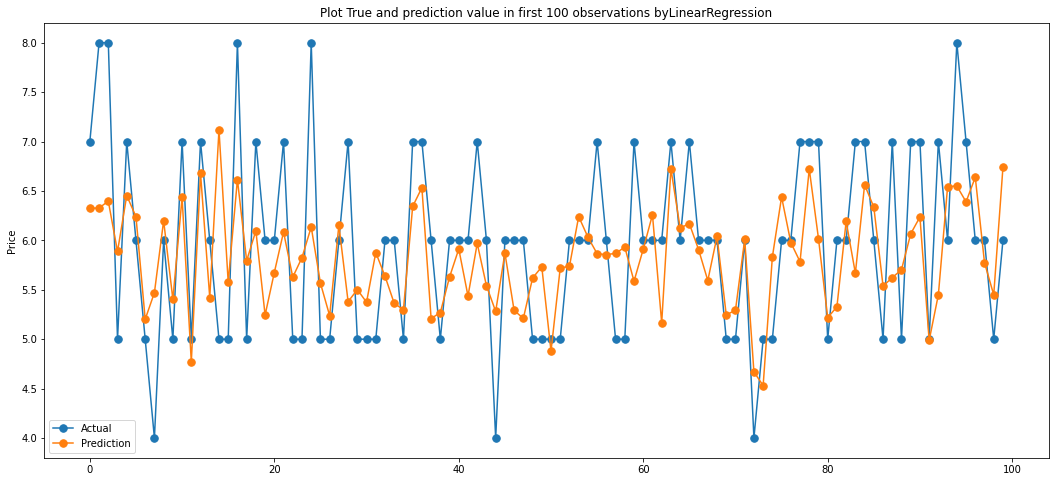

In [23]:
plot_true_vs_pred(name,y_test[:100].values,ypred_test[:100])

In [24]:
list(zip(X_train,lr.coef_))

[('fixed acidity', 0.13568756899974954),
 ('volatile acidity', -1.9178404900972326),
 ('citric acid', -0.09625179514614109),
 ('residual sugar', 0.09206010836905854),
 ('chlorides', 1.038033931615578),
 ('free sulfur dioxide', 0.004191154752834103),
 ('total sulfur dioxide', -0.00021886408665228174),
 ('density', -196.11935063085727),
 ('pH', 0.8963400201218426),
 ('sulphates', 0.9711523635594506),
 ('alcohol', 0.14082670831793834)]

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)
ypred_train = dtr.predict(X_train)
ypred_test = dtr.predict(X_test)
name = dtr.__class__.__name__
algo_score = algo_score.append(summary_score(name,y_train,ypred_train,y_test,ypred_test))
cross_val = cross_val_score(dtr,X_train,y_train,cv=4)
print('Cross validation average score: ')
print(np.mean(cross_val))

Model:  DecisionTreeRegressor
--Result in train and test data set--
MAE train:  0.0
MAE test 0.6412948381452318
R2_score train:  1.0
R2_score test:  -0.23556695043409115
Cross validation average score: 
-0.30298918202586667


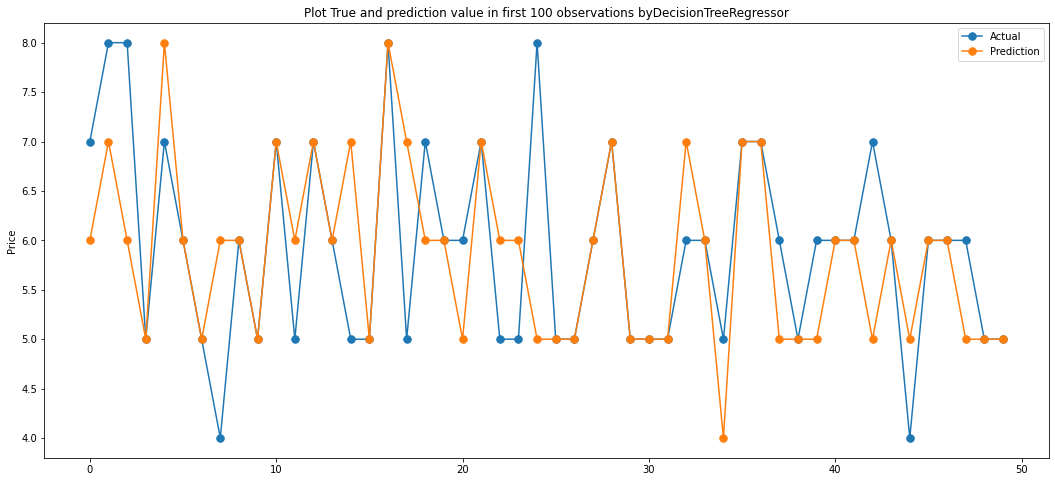

In [26]:
plot_true_vs_pred(name,y_test[:50].values,ypred_test[:50])

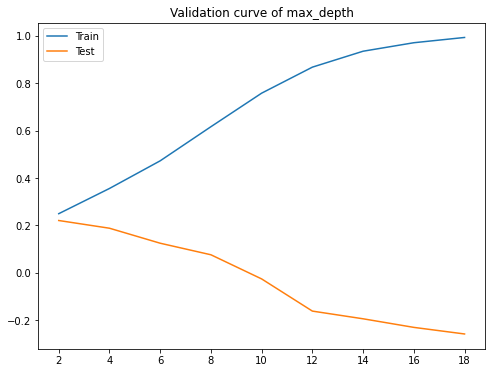

In [27]:
from sklearn.model_selection import validation_curve
param_name = 'max_depth'
param_range = range(2,20,2)
curve=validation_curve(dtr,X_train,y_train,cv=5,param_name=param_name,
    param_range=param_range,scoring='r2')

plot_validation_curve(curve,param_range,param_name)

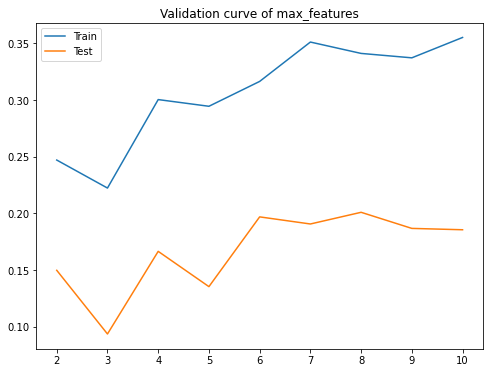

In [28]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='max_features'
param_range = range(2,11)
curve=validation_curve(dtr,X_train,y_train,cv=5,param_name=param_name,
    param_range=param_range,scoring = 'r2')
plot_validation_curve(curve,param_range,param_name)